In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

liver_data = pd.read_csv("C:/Users/Dell/anaconda3/Lib/site-packages/pandas/core/data/indian_liver_patient.csv")

In [2]:
# Success - Display the first record
display(liver_data.head(n=5))
# liver_data.head(n=5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
liver_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
liver_data.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease 167
Percentage of patients likely to have liver disease 71.35506003430532%


<Axes: xlabel='Dataset', ylabel='count'>

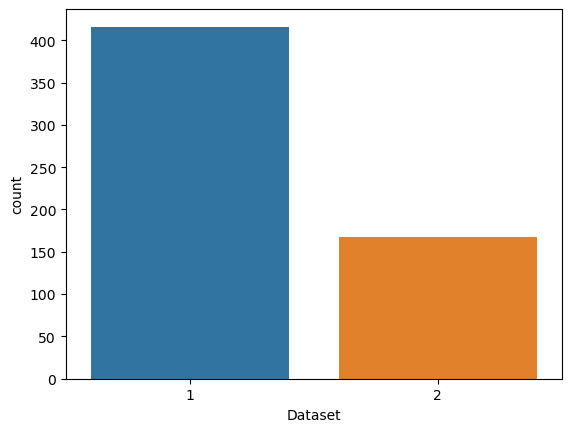

In [6]:
import seaborn as sns

n_records = len(liver_data.index)
n_records_liv_pos = len(liver_data[liver_data['Dataset'] == 1])
n_records_liv_neg = len(liver_data[liver_data['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100

print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease {}%".format(percent_liver_disease_pos))

sns.countplot(data=liver_data, x = 'Dataset', label='Count')

In [7]:
liver_data_labels = liver_data['Dataset']
# Drop label feature
liver_data_features = liver_data.drop(['Dataset'], axis=1)
# liver_data_features.head()

In [8]:
#Missing values
display(liver_data_features[liver_data_features['Albumin_and_Globulin_Ratio'].isnull()])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN


In [9]:
# fill missing values with median value
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)

albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.93
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.93
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.93
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.93


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

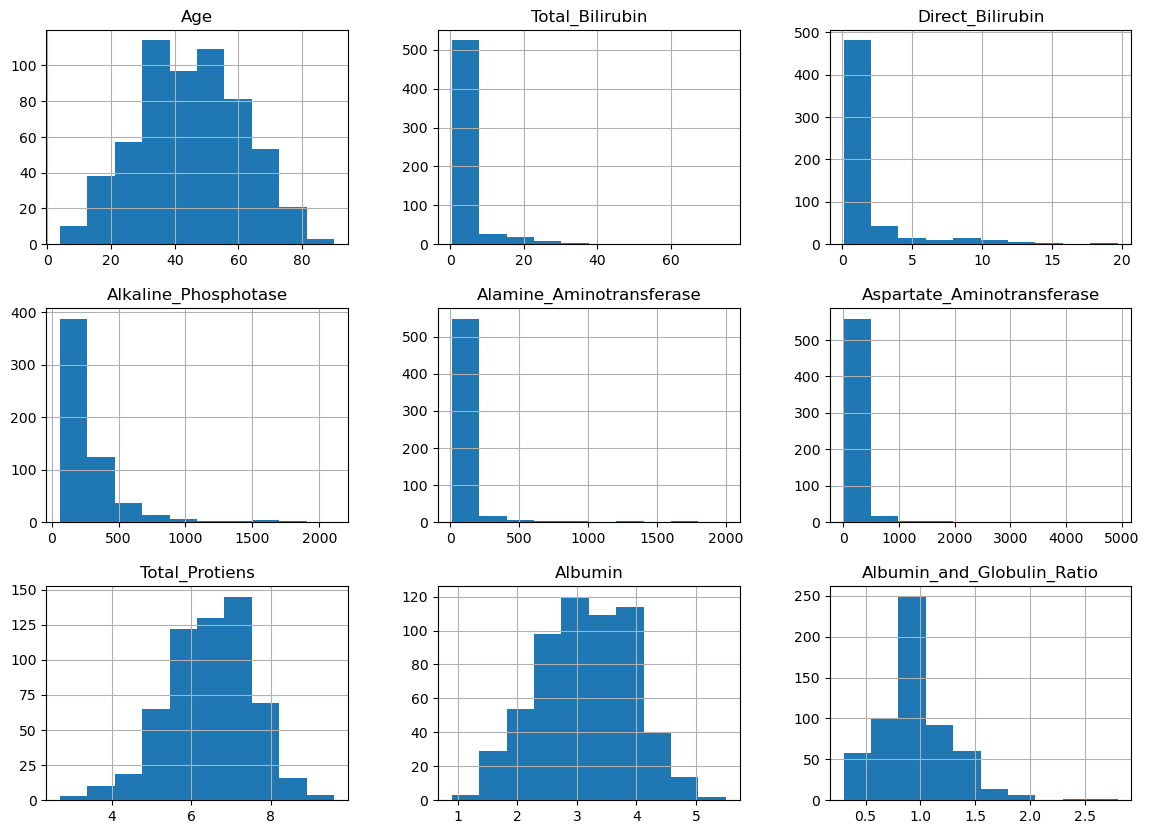

In [10]:
# plot features histogram
liver_data_features.hist(figsize=(14,10))

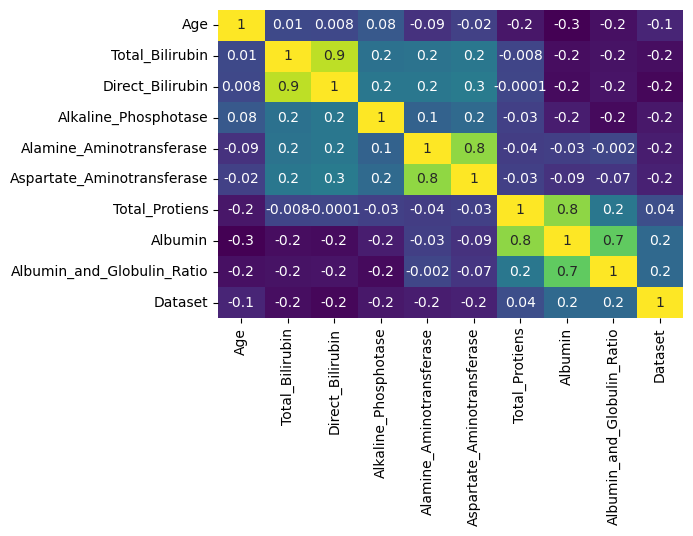

In [11]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(liver_data.corr(numeric_only=True), annot=True, fmt='.1g', cmap="viridis", cbar=False);

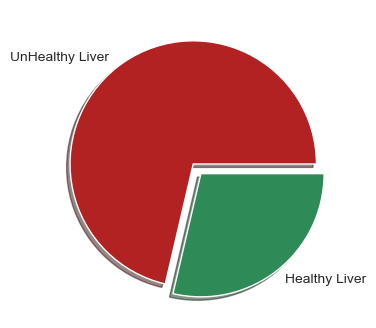

In [12]:
import seaborn as sns
sns.set_style("whitegrid")  # Sets the seaborn style to "whitegrid"

fig, ax = plt.subplots(figsize=(4,4))

plt.pie(x=liver_data["Dataset"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

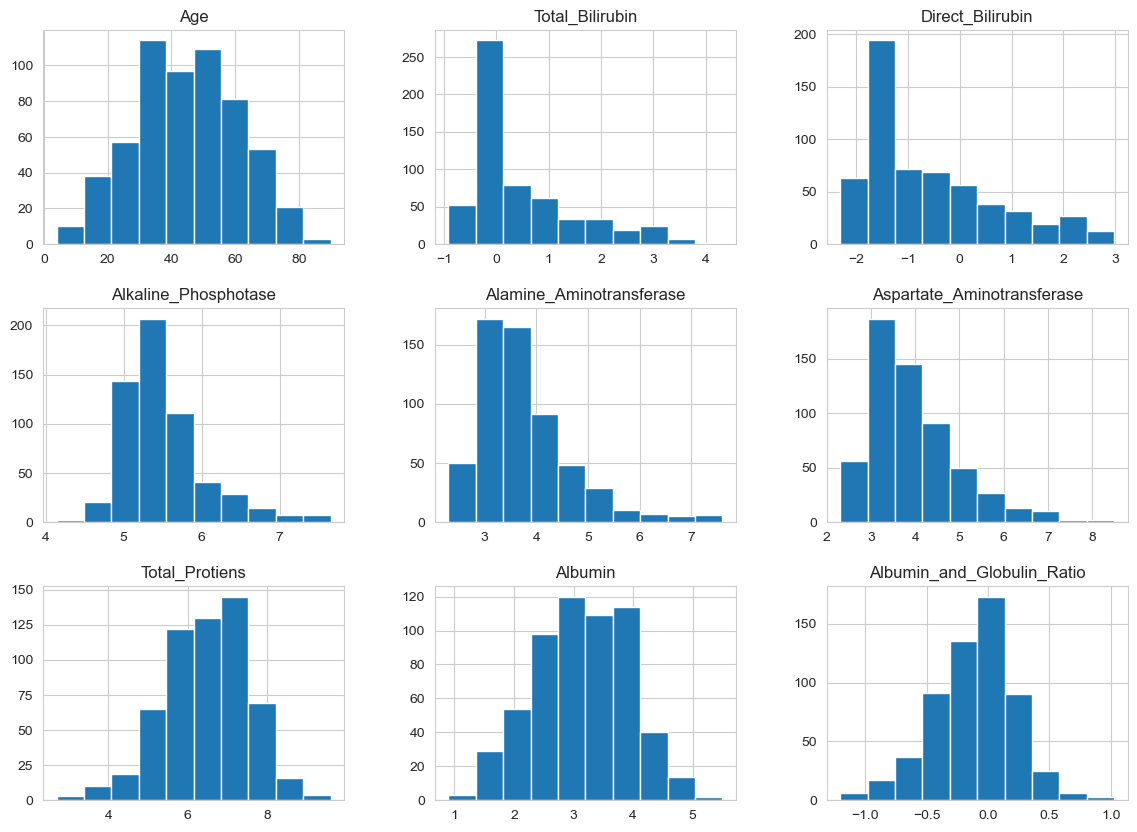

In [13]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] = liver_data_features[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,10))

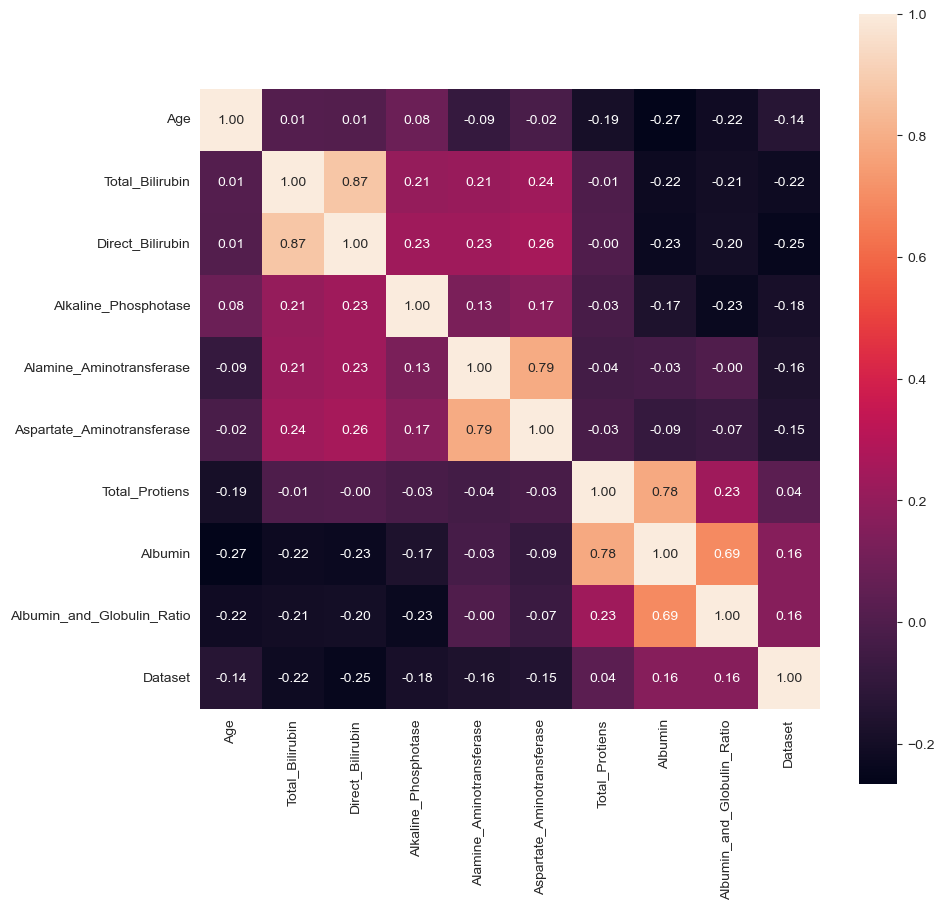

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# calculate correlation coefficients for the dataset
correlations = liver_data.corr(numeric_only=True)

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

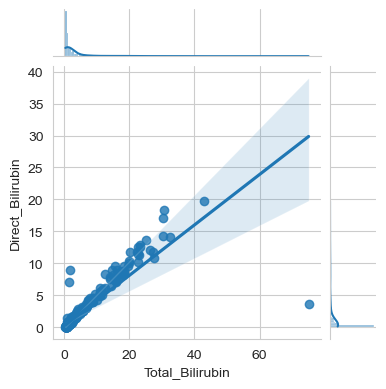

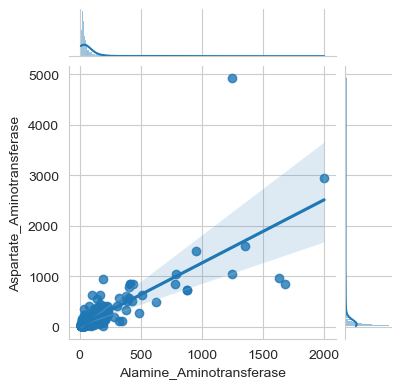

In [15]:
sns.jointplot(x="Total_Bilirubin",y="Direct_Bilirubin", data=liver_data, kind="reg",height=4)
sns.jointplot(x="Alamine_Aminotransferase",y="Aspartate_Aminotransferase", data=liver_data, kind="reg",height=4 )

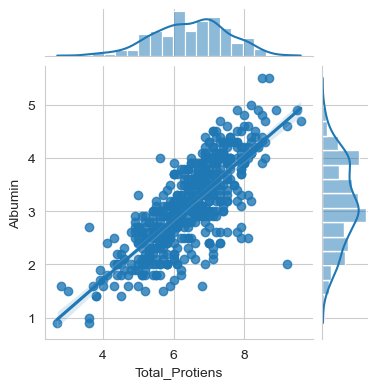

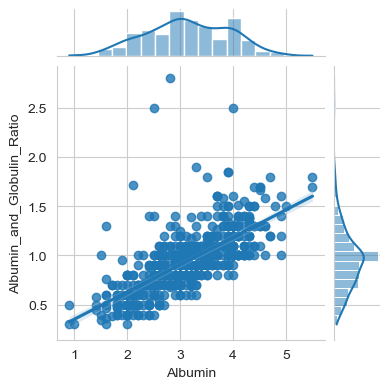

In [16]:
sns.jointplot(x="Total_Protiens",y="Albumin", data=liver_data, kind="reg",height=4)
sns.jointplot(x="Albumin",y="Albumin_and_Globulin_Ratio", data=liver_data, kind="reg",height=4) 

## Based on the correlation plots, the following pairs of features seem to be related:
1. Total_Bilirubin & Direct_Bilirubin 
2. 
Alamine_Aminotransferase & Aspartate_Aminotransferse
3. 
Total_Protiens & Almin
4. n
Albumin & Albumin_and_Globuliationtio

In [17]:
# Independent and Dependent Feature:
X = liver_data.iloc[:, :-1]
y = liver_data.iloc[:, -1]



In [18]:
X = liver_data.drop(columns='Dataset', axis=1)
y = liver_data['Dataset']

In [19]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [21]:
# Convert the Gender column to a string data type
liver_data['Gender'] = liver_data['Gender'].astype(str)

# Encode the Gender column with 1 for Male and 0 for Female
liver_data['Gender'] = np.where(liver_data['Gender']=='Male', 1, 0)

# Convert the Gender column to a numeric data type
liver_data['Gender'] = liver_data['Gender'].astype(int)

In [22]:
display(liver_data)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [23]:
from imblearn.over_sampling import RandomOverSampler
# Create a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit the oversampler to the data
oversampler.fit(X, y)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)
print("X_resampled shape:", X_resampled.shape)
print("Y_resampled shape:", y_resampled.shape)

X_resampled shape: (832, 10)
Y_resampled shape: (832,)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.35, random_state=101)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (540, 10)
X_test shape: (292, 10)


## Training the model using Logistic Regression

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'X_train' and 'X_test' contain your feature variables, including categorical ones

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns in X_train
X_train_encoded = encoder.fit_transform(X_train)

# Transform the categorical columns in X_test (using the fitted encoder)
X_test_encoded = encoder.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000) #Increasing number of iterations for logistic Regression
model1.fit(X_train_encoded, Y_train)

LogisticRegression(max_iter=1000)

In [27]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model1.predict(X_train_encoded)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data using Logistic Regression : ', training_data_accuracy*100)

Accuracy on Training data using Logistic Regression :  98.88888888888889


In [28]:
# accuracy on test data
X_test_prediction = model1.predict(X_test_encoded)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data using Logistic Regression : ', test_data_accuracy*100)

Accuracy on Test data using Logistic Regression :  78.76712328767124


## Training the model using Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_train_encoded,Y_train)

RandomForestClassifier()

In [30]:
X_train_prediction2 = model2.predict(X_train_encoded)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy on Training data using Random Forest Classifier : ', training_data_accuracy2*100)

Accuracy on Training data using Random Forest Classifier :  100.0


In [31]:
X_test_prediction2 = model2.predict(X_test_encoded)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)
print('Accuracy on Test data using Random Forest Classifier : ', test_data_accuracy2*100)

Accuracy on Test data using Random Forest Classifier :  82.1917808219178


## Training the model using Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=101)
model3.fit(X_train_encoded, Y_train)

DecisionTreeClassifier(random_state=101)

In [33]:
X_train_prediction3 = model3.predict(X_train_encoded)
training_data_accuracy3 = accuracy_score(X_train_prediction3, Y_train)
print('Accuracy on Training data using Decision Tree Classifier : ', training_data_accuracy3*100)

Accuracy on Training data using Decision Tree Classifier :  100.0


In [34]:
X_test_prediction3 = model3.predict(X_test_encoded)
test_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)
print('Accuracy on Test data using Decision Tree Classifier : ', test_data_accuracy3*100)

Accuracy on Test data using Decision Tree Classifier :  74.65753424657534


## Creating Data Frame for the accuracy score of logistic regression,Random Forest Classifier and Decision Tree Classifier

In [35]:
import pandas as pd

# Create DataFrames for each model's results
results_data = [
    ["Logistic Regression", training_data_accuracy*100, test_data_accuracy*100],
    ["Random Forest Classifier", training_data_accuracy2*100, test_data_accuracy2*100],
    ["Decision Tree Classifier", training_data_accuracy3*100, test_data_accuracy3*100]
]

# Create a list of DataFrames
results_dfs = [pd.DataFrame(data=[row], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']) for row in results_data]

# Concatenate the DataFrames
results_df = pd.concat(results_dfs, ignore_index=True)

# Display the concatenated DataFrame
print(results_df)


                      Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression            98.888889           78.767123
1  Random Forest Classifier           100.000000           82.191781
2  Decision Tree Classifier           100.000000           74.657534


## So by Analysing the above table we can easily guess that Random Forest Classifier is performing well for Training and Testing accuracy score. So we will Continue Predicting the new Data with Random Forest Classifier Model.

In [36]:
import pickle

# Assuming your trained model is stored in a variable called model
# Train your model first
# model = ...

# Then, save the model to a file
with open('liver_model.pkl', 'wb') as f:
    pickle.dump(model2, f)


In [39]:
import shutil

# Move the pickle file to the model directory
shutil.move('liver_model.pkl', 'C:/Users/Dell/OneDrive/Desktop/Predict Liver Disease/model')


'C:/Users/Dell/OneDrive/Desktop/Predict Liver Disease/model\\liver_model.pkl'